In [1]:
import nibabel as nib
import numpy as np
import os
import nibabel.orientations as ornt
import matplotlib.pyplot as plt
import cv2
from glob import glob
from sklearn.preprocessing import OneHotEncoder

In [2]:
root = "../data/"

### Get image header information

In [3]:
a = nib.load(os.path.join(root, "synapse_training", "DET0000101_avg.nii.gz"))

In [4]:
a_array = a.get_fdata()
a_array.shape

(192, 156, 12)

In [5]:
affine = a.affine
orientation = ornt.io_orientation(affine)
print(orientation)

# first column: 0 1 2 order of x, y, z axis
# second column: 1 1 1 orientation of image when aligned with axis, normal orientation

[[0. 1.]
 [1. 1.]
 [2. 1.]]


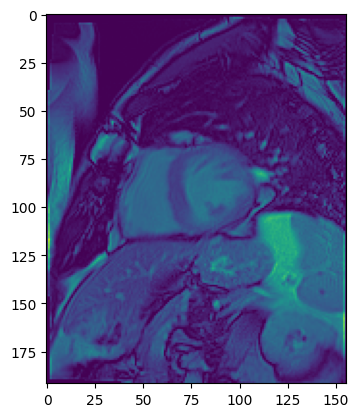

In [6]:
plt.imshow(a_array[:, :, 6])

In [7]:
images = sorted(glob(os.path.join(root, "synapse_training", "*.nii.gz")))

for img in images: 
    img = nib.load(img).get_fdata()
    print(img.shape)

(192, 156, 12)
(256, 256, 11)
(192, 186, 8)
(256, 256, 13)
(256, 256, 12)
(288, 288, 12)
(240, 240, 12)
(320, 320, 13)
(192, 156, 15)
(256, 200, 11)
(256, 200, 12)
(256, 256, 15)
(256, 256, 12)
(256, 256, 12)
(256, 256, 11)
(256, 256, 12)
(288, 288, 14)
(512, 512, 14)
(512, 512, 15)
(512, 512, 13)
(512, 512, 17)
(512, 512, 15)
(256, 256, 12)
(256, 256, 10)
(256, 256, 14)
(256, 256, 14)
(256, 256, 12)
(256, 256, 13)
(256, 256, 14)
(256, 256, 14)
(256, 256, 14)
(256, 256, 14)
(256, 256, 15)
(256, 256, 12)
(256, 256, 12)
(256, 192, 13)
(256, 192, 13)
(256, 200, 11)
(256, 256, 16)
(256, 256, 13)
(256, 256, 14)
(256, 256, 16)
(256, 256, 14)
(256, 256, 11)
(256, 256, 11)
(256, 256, 11)
(256, 256, 10)
(256, 256, 10)
(256, 256, 12)
(256, 256, 13)
(256, 256, 13)
(192, 192, 10)
(256, 216, 9)
(256, 256, 13)
(320, 320, 14)
(256, 256, 12)
(192, 192, 12)
(256, 208, 9)
(256, 208, 11)
(256, 256, 10)
(192, 192, 15)
(192, 156, 8)
(192, 192, 9)
(256, 224, 11)
(192, 156, 8)
(192, 192, 10)
(192, 162, 11)
(

### Image preprocessing

In [8]:
print(np.min(a_array), np.max(a_array), len(np.unique(a_array)))

print(np.unique(a_array))


# value in range of 0 - 255 

0.0 255.0 252
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 19

In [9]:
a_array_resize = cv2.resize(a_array[:, :, 6], (256, 256)) / 255

In [10]:
print(np.min(a_array_resize), np.max(a_array_resize), len(np.unique(a_array_resize)))

print(a_array_resize)

0.0 0.6669079350490196 40910
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.00196461 ... 0.07434513 0.03105469 0.        ]
 [0.         0.         0.         ... 0.06370634 0.02679228 0.        ]
 [0.         0.         0.         ... 0.0536152  0.02273284 0.        ]]


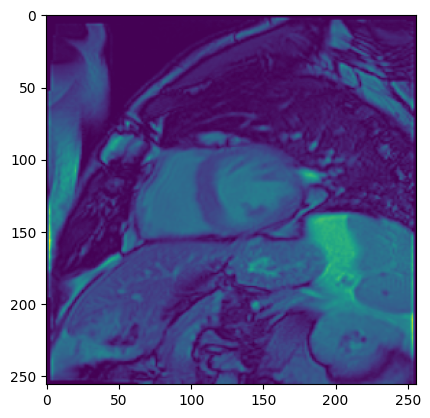

In [11]:
plt.imshow(a_array_resize) 

### MASK PROCESSING

In [12]:
m = nib.load(os.path.join(root, "synapse_training_labels", "DET0000101_avg_seg.nii.gz"))

In [13]:
m_array = m.get_fdata()

print(m_array.shape)

(192, 156, 12)


In [14]:
print(np.min(m_array), np.max(m_array), len(np.unique(m_array)))

print(np.unique(m_array))

0.0 1.0 2
[0. 1.]


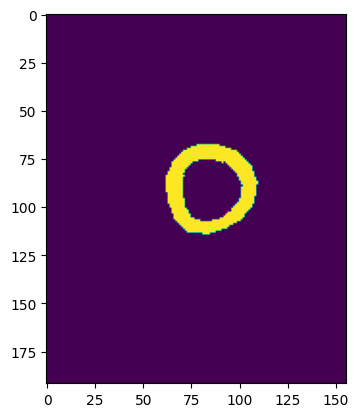

In [15]:
plt.imshow(m_array[:, :, 6])

In [43]:
m_array_resize = cv2.resize(m_array[:, :, 6], (256, 256)).astype(np.int8) 

In [44]:
print(np.min(m_array_resize), np.max(m_array_resize), len(np.unique(m_array_resize)))

print(np.unique(m_array_resize))

0 1 2
[0 1]


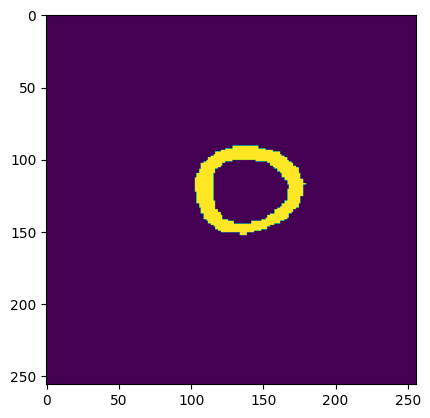

In [45]:
plt.imshow(m_array_resize)

In [46]:
print(m_array_resize)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
cv2.imwrite("./test.png", m_array_resize * 255)

True

In [49]:
m_array_resize_encode_2 = np.stack(
    [np.where(m_array_resize == i, 1, 0) for i in np.unique(m_array_resize)], axis=-1)

In [50]:
print(m_array_resize_encode_2.shape, np.min(m_array_resize_encode_2), np.max(
    m_array_resize_encode_2), len(np.unique(m_array_resize_encode_2)))

print(np.unique(m_array_resize_encode_2))

(256, 256, 2) 0 1 2
[0 1]


In [28]:
# one hot encode resized mask 

m_array_resize = m_array_resize.reshape(-1, 1)

enc = OneHotEncoder(sparse_output=False, dtype=np.int8, max_categories=2) 

m_array_resize_encode = enc.fit_transform(m_array_resize, (256, 256, 2))

In [29]:
print(m_array_resize_encode.shape) 
print(m_array_resize_encode.dtype)
print(m_array_resize_encode)


(65536, 2)
int8
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [30]:
m_array_resize_encode = m_array_resize_encode.reshape(256, 256, 2) 

In [32]:
print(m_array_resize_encode.shape, np.min(m_array_resize_encode), np.max(
    m_array_resize_encode), len(np.unique(m_array_resize_encode)))

print(np.unique(m_array_resize_encode))

(256, 256, 2) 0 1 2
[0 1]


### Test volumetric to slice 

In [61]:
img = cv2.imread(
    "E:\\ISEF\\Triple-View-R-Net\\data_for_training\\images\\synapse72-slice006_axial.png")

print(np.min(img), np.max(img), len(np.unique(img)))

0 255 252
